In [1]:
import pandas as pd

In [121]:
df = pd.read_csv('raw_data.txt')
df.head(3)

,high,last,created_at,book,volume,vwap,low,ask,bid,change_24
0,178565.38,167761.49,2020-02-27T01:51:00+00:00,btc_mxn,358.79390,171361.83299,165000.01,167761.49,167643.05,-10384.67
1,178565.38,167643.05,2020-02-27T01:52:00+00:00,btc_mxn,357.62323,171341.03777,165000.01,167755.91,167643.05,-10117.13
2,178565.38,167639.96,2020-02-27T01:53:00+00:00,btc_mxn,357.71302,171339.77428,165000.01,167755.91,167639.96,-10120.22


In [122]:
df = pd.read_csv('raw_data.txt',usecols=['last','created_at','volume'],index_col=1,parse_dates=True)
df.index.name = 'Time'

In [124]:
df.head(3)

,last,volume
Time,,
2020-02-27 01:51:00+00:00,167761.49,358.79390
2020-02-27 01:52:00+00:00,167643.05,357.62323
2020-02-27 01:53:00+00:00,167639.96,357.71302


In [137]:
ohlc = df['last'].resample('30T').ohlc()

In [138]:
ohlc.head(3)

,open,high,low,close
Time,,,,
2020-02-27 01:30:00+00:00,167761.49,168896.91,167639.96,168765.00
2020-02-27 02:00:00+00:00,168101.24,169632.18,167630.31,168771.94
2020-02-27 02:30:00+00:00,168771.94,168885.56,167630.31,168301.12


In [139]:
vol = df['volume'].resample('30T').sum()

In [140]:
vol.head(3)

Time
2020-02-27 01:30:00+00:00     3231.78684
2020-02-27 02:00:00+00:00    10640.60103
2020-02-27 02:30:00+00:00    10605.08984
Freq: 30T, Name: volume, dtype: float64

In [141]:
ohlcv = pd.concat([ohlc,vol],axis=1)

In [142]:
ohlcv.head(3)

,open,high,low,close,volume
Time,,,,,
2020-02-27 01:30:00+00:00,167761.49,168896.91,167639.96,168765.00,3231.78684
2020-02-27 02:00:00+00:00,168101.24,169632.18,167630.31,168771.94,10640.60103
2020-02-27 02:30:00+00:00,168771.94,168885.56,167630.31,168301.12,10605.08984


In [143]:
ohlcv.columns = ohlcv.columns.str.capitalize()

In [144]:
ohlcv.head(3)

,Open,High,Low,Close,Volume
Time,,,,,
2020-02-27 01:30:00+00:00,167761.49,168896.91,167639.96,168765.00,3231.78684
2020-02-27 02:00:00+00:00,168101.24,169632.18,167630.31,168771.94,10640.60103
2020-02-27 02:30:00+00:00,168771.94,168885.56,167630.31,168301.12,10605.08984


In [145]:
ohlcv.tail(3)

,Open,High,Low,Close,Volume
Time,,,,,
2020-02-28 00:30:00+00:00,173368.37,173484.98,172022.79,172450.00,10125.68275
2020-02-28 01:00:00+00:00,172388.96,173188.22,171850.04,171982.46,10002.92101
2020-02-28 01:30:00+00:00,172049.59,173399.80,172049.59,172739.47,8944.86550


In [146]:
import mplfinance as mpf

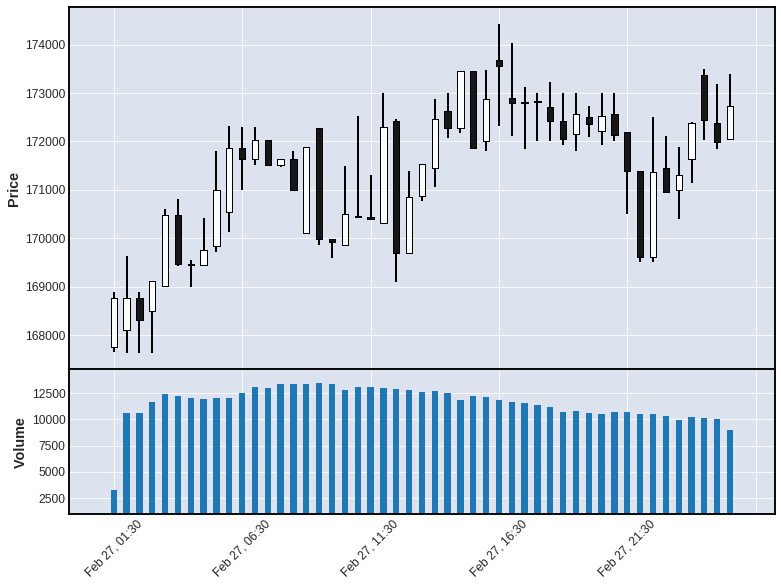

In [147]:
mpf.plot(ohlcv,type='candle',volume=True,figscale=1.75)